## Loading reaching data
Here we will cover how to load reaching data. Once imported, this data can be analyzed to understand reaching movements and kinematics, or correlated with simultaneously recording spiking data to characterize neural correlates of reaching.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading in reach data as a pandas dataframe
Reaching data is stored in a comma separated value file (csv). These files can vary a bit in what is stored. Generally, the first few columns encode time related information to help synchronize reaching data with neural recordings. This is followed by the x,y, and z coordinates of key points on the paw that were tracked by DeepLabCut. Lastly, a few derived measures are included that capture global aspects of the reach.

In [2]:
# reach file
reach_dir = '../test_data/reach/'
reach_file = reach_dir + 'reach_data.csv'

Here is how you load reach data into your python workspace.

In [3]:
# load reach data as pandas dataframe
reach = pd.read_csv(reach_file)

### Helpful code snippets for interacting with reaching data
A few quick ways to get information on the reach data.

In [4]:
# a list of column names in your reach data
col_names = reach.columns.values
print('Reach column names:\n{}'.format(col_names))

Reach column names:
['BinaryIndex' 'Time' 'Epoch' 'Carpus_x' 'Carpus_y' 'Carpus_z'
 'Metacarpus_x' 'Metacarpus_y' 'Metacarpus_z' 'Radius_x' 'Radius_y'
 'Radius_z' 'Finger1Tip_x' 'Finger1Tip_y' 'Finger1Tip_z' 'Finger2DJoint_x'
 'Finger2DJoint_y' 'Finger2DJoint_z' 'Finger2MJoint_x' 'Finger2MJoint_y'
 'Finger2MJoint_z' 'Finger2PJoint_x' 'Finger2PJoint_y' 'Finger2PJoint_z'
 'Finger2Tip_x' 'Finger2Tip_y' 'Finger2Tip_z' 'Finger3DJoint_x'
 'Finger3DJoint_y' 'Finger3DJoint_z' 'Finger3MJoint_x' 'Finger3MJoint_y'
 'Finger3MJoint_z' 'Finger3PJoint_x' 'Finger3PJoint_y' 'Finger3PJoint_z'
 'Finger3Tip_x' 'Finger3Tip_y' 'Finger3Tip_z' 'Finger4DJoint_x'
 'Finger4DJoint_y' 'Finger4DJoint_z' 'Finger4MJoint_x' 'Finger4MJoint_y'
 'Finger4MJoint_z' 'Finger4PJoint_x' 'Finger4PJoint_y' 'Finger4PJoint_z'
 'Finger4Tip_x' 'Finger4Tip_y' 'Finger4Tip_z' 'Finger5DJoint_x'
 'Finger5DJoint_y' 'Finger5DJoint_z' 'Finger5MJoint_x' 'Finger5MJoint_y'
 'Finger5MJoint_z' 'Finger5PJoint_x' 'Finger5PJoint_y' 'Finger5PJoint_z

In [5]:
# list of reaching epochs, note these can sometimes increment in steps greater than 1
epochs = pd.unique(reach['Epoch'])
print("Reach epoch ID list:\n{}".format(epochs))

# number of epochs
epoch_num = len(epochs)
print("There are {} reaching epochs".format(epoch_num))

Reach epoch ID list:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75]
There are 75 reaching epochs


Here we will exploit the dataframe *groupby* method to apply a fuction to each reaching epoch separately

Text(0.5, 1.0, 'Reach epoch duration distribution')

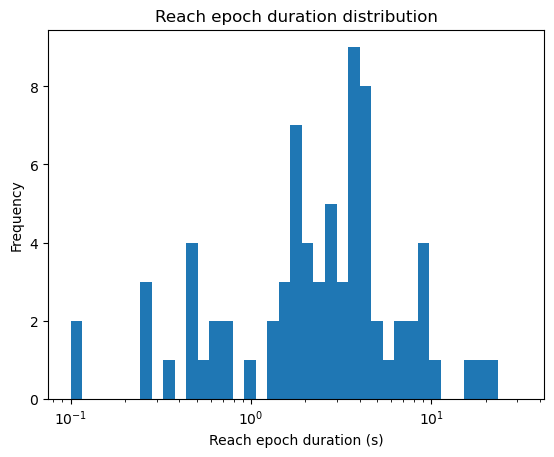

In [6]:
# duration of each reach epoch
dur_func = lambda x: x['Time'].iloc[-1]-x['Time'].iloc[0]
reach_durs = reach.groupby(['Epoch']).apply(dur_func)
ax = reach_durs.plot.hist(bins=np.logspace(-1,1.5,40))
ax.set_xscale('log')
ax.set_xlabel('Reach epoch duration (s)')
ax.set_title('Reach epoch duration distribution')

As can be seen, there is a wide range of durations, from 100 ms to 30 s.

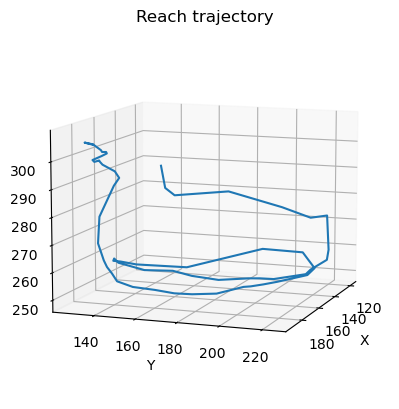

In [7]:
# create numpy array of paw centroid for each epoch
arr_func = lambda x: np.array(x[['Centroid_x','Centroid_y','Centroid_z']])
reach_cents = reach.groupby('Epoch').apply(arr_func)

# select one for plotting
reach_sel = reach_cents.iloc[2]

# plot the paw path in 3D
ax = plt.figure().add_subplot(projection='3d')
ax.plot(reach_sel[:,0],reach_sel[:,1],reach_sel[:,2])
ax.view_init(10,20)
ax.set_title('Reach trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

This reach trajectory is typical. The paw comes down, sweeps across the base of the food chamber twice, and then retracts.

In [8]:
# display the reach trajectory array
print('Paw centroid array:\n{}'.format(reach_sel))

Paw centroid array:
[[         nan          nan          nan]
 [         nan          nan          nan]
 [         nan          nan          nan]
 [         nan          nan          nan]
 [         nan          nan          nan]
 [         nan          nan          nan]
 [         nan          nan          nan]
 [         nan          nan          nan]
 [181.23554993          nan 306.14627446]
 [159.47862244 153.04777645 294.34536318]
 [151.53371938 151.09695112 284.74209048]
 [149.76311493 154.99975845 281.85291158]
 [131.70745659 173.85701555 281.28665406]
 [128.66690954 199.69827794 275.92035689]
 [130.30456098 214.7518779  272.89647259]
 [128.70222626 222.27984274 273.82644754]
 [130.12669172 223.74139562 261.11134625]
 [125.4400446  221.13839519 256.20170187]
 [122.24170685 211.75108116 251.2772822 ]
 [119.81146843 208.36993431 248.81597627]
 [128.28584841 195.53395199 247.89080422]
 [131.4267451  189.7354505  248.48382787]
 [136.37871763 186.25139374 249.27053885]
 [138.82685683

Note that the beginning and end of the array have NaNs for some coordinates, indicating that most of the paw was occluded and we can't be confident of it's position. Thus, when calculating reach epoch durations, it might make more sense to only count those time when the paw is in full view.

Text(0.5, 1.0, 'Reach duration distribution')

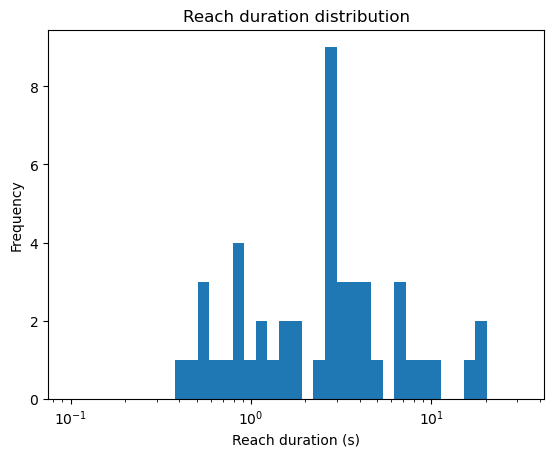

In [9]:
# reach durations, only valid time points
def reach_dur_func(epoch_df):
    paw_cents = np.array(epoch_df[['Centroid_x','Centroid_y','Centroid_z']])
    paw_valid_inds = np.nonzero(np.all(~np.isnan(paw_cents),axis=1))[0]
    if paw_valid_inds.size == 0:
        return 0
    start_time = epoch_df['Time'].iloc[paw_valid_inds[0]]
    end_time = epoch_df['Time'].iloc[paw_valid_inds[-1]]
    return end_time - start_time

reach_durs = reach.groupby('Epoch').apply(reach_dur_func)

# plot new distribution of reach durations
ax = reach_durs.plot.hist(bins=np.logspace(-1,1.5,40))
ax.set_xscale('log')
ax.set_xlabel('Reach duration (s)')
ax.set_title('Reach duration distribution')

In [10]:
print('Reach durations:\n{}'.format(reach_durs))

Reach durations:
Epoch
1     0.520667
2     0.470700
3     0.580733
4     1.522100
5     0.791100
        ...   
71    0.000000
72    4.456033
73    0.000000
74    0.000000
75    2.713667
Length: 75, dtype: float64


Notice that some of the reachs have a duration of zero, making them invalid. Let's remove those epochs with them from the original reach dataframe.

In [11]:
valid_epochs = reach_durs.index[reach_durs!=0]
reach_valid = reach[reach['Epoch'].isin(valid_epochs)]
print('We kept {} of {} epochs'.format(valid_epochs.size, reach_durs.shape[0]))

We kept 49 of 75 epochs


### Reformatting reach dataframe
Here we will clean up the table of reach data and group reach coordinates by epoch.

In [12]:
# remove time points without a paw centroid
reach = reach.dropna(axis=0,subset=['Centroid_x', 'Centroid_y', 'Centroid_z'])

# group coordinates/trajectories by epoch
reach = reach.groupby('Epoch',axis=0).agg(list)


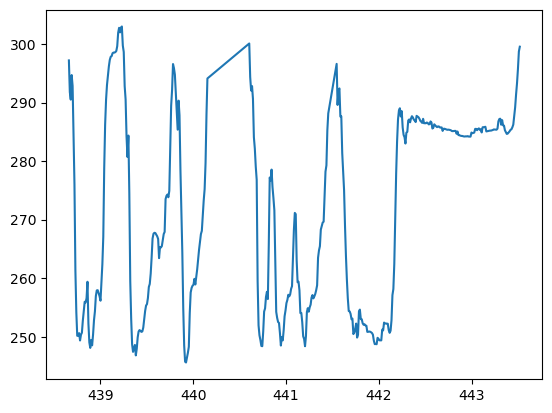

In [43]:
ind = 6
plt.plot(reach['Time'].iloc[ind], reach['Centroid_z'].iloc[ind])